In [5]:
from __future__ import division,print_function

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,6)

from sklearn import metrics,datasets,model_selection

from sklearn import svm

np.random.seed(1)

To test our SVM machinery, let's make a linearly separable dataset

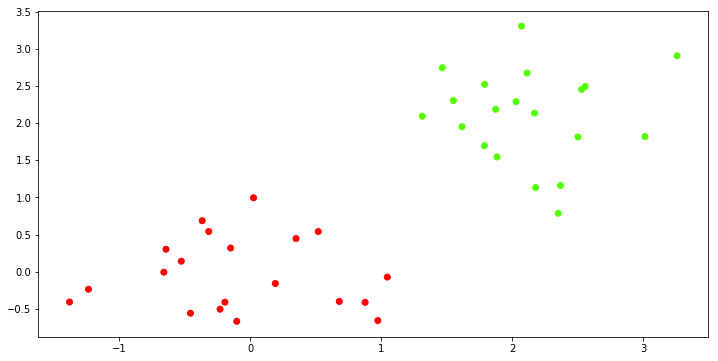

In [6]:
x0_0 = 0.6*np.random.randn(20)
x1_0 = 0.6*np.random.randn(20)
x0_1 = 2+0.6*np.random.randn(20)
x1_1 = 2+0.6*np.random.randn(20)
x0 = np.hstack((x0_0,x0_1))
x1 = np.hstack((x1_0,x1_1))
X = np.c_[x0,x1]

y = np.ones((40))
y[:20] = -1

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.prism)
plt.show()

This dataset is linearly separable, so we'll fit an SVM similar to a hard margin SVM by setting C very large.  We will utilize the scikit-learn svm.SVC object, which is a support vector machine classifier.  Since this is the two class case, it's not doing anything too fancy.

In [7]:
clf = svm.SVC(C=10000,kernel='linear')
clf.fit(X,y)

SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

We can use this to make predictions.

In [8]:
y_pred = clf.predict(X)
print ("Classifier Accuracy: ",sum(y==y_pred).astype(float)/len(y))

Classifier Accuracy:  1.0


Since the data is linearly separable, we of course get 100% accuracy.

Now, let's plot the decision boundary and margins.  The decision boundary is given by
$$
x_0 w_0 + x_1 w_1 + b = 0
$$
and the margins are given by
$$
x_0 w_0 + x_1 w_1 + b = \pm 1
$$
We can solve for this line ($x_1$ as a function of $x_0$) and plot, which gives us:


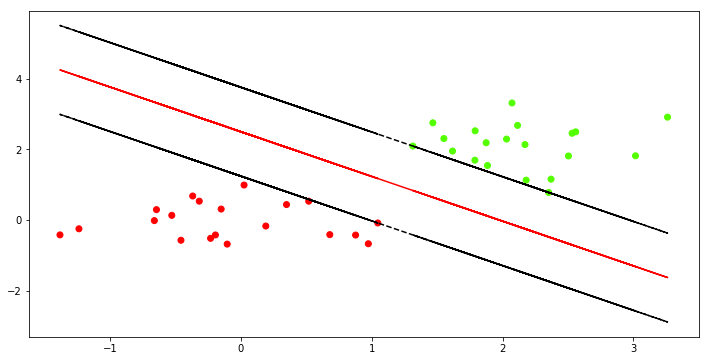

In [10]:
w0 = clf.coef_[0,0]
w1 = clf.coef_[0,1]
b = clf.intercept_

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.prism)
plt.plot(x0,(0- b - w0*x0)/w1,'r-')
plt.plot(x0,(1 - b - w0*x0)/w1,'k--')
plt.plot(x0,(-1 - b - w0*x0)/w1,'k--')
plt.show()


Now let's try this with a problem that isn't linearly separable.  We will use the moons dataset available with sklearn.

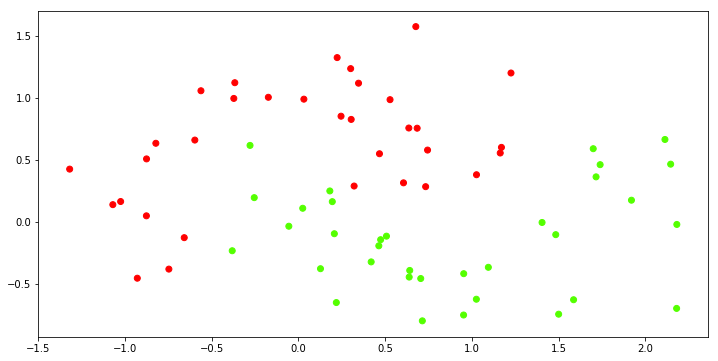

In [12]:
X,y = datasets.make_moons(noise=0.3, random_state=0) 
X,X_test,y,y_test = model_selection.train_test_split(X,y,test_size=0.33)
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.prism)
plt.show()

Let's try to fit this data with a linear kernel SVM

In [13]:
clf = svm.SVC(C=10000,kernel='linear')
clf.fit(X,y)

SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

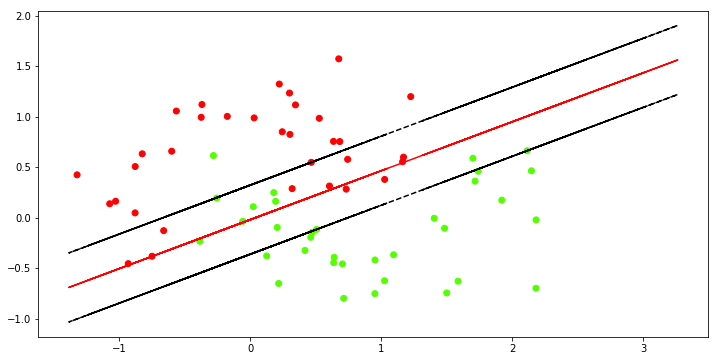

In [15]:
w0 = clf.coef_[0,0]
w1 = clf.coef_[0,1]
b = clf.intercept_

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.prism)
plt.plot(x0,(0 - b - w0*x0)/w1,'r-')
plt.plot(x0,(1 - b - w0*x0)/w1,'k--')
plt.plot(x0,(-1 - b - w0*x0)/w1,'k--')
plt.show()

Obviously, we are unable to correctly classify all the data points.  Instead, let's try the radial basis function kernel.

In [16]:
clf = svm.SVC(C=1,gamma=2,kernel='rbf')
clf.fit(X,y)

y_pred = clf.predict(X)
yt_pred = clf.predict(X_test)

Unlike the linear case, it's not easy to explicitly solve for the decision boundary, so instead we will draw contours on the classes predicted over a grid.

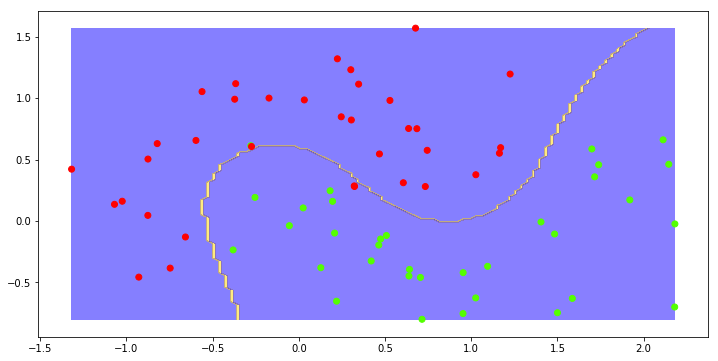

In [18]:
x0l = np.linspace(X[:,0].min(),X[:,0].max(),101)
x1l = np.linspace(X[:,1].min(),X[:,1].max(),101)

X0,X1 = np.meshgrid(x0l,x1l)
XX = np.c_[X0.ravel(),X1.ravel()]
YY = clf.predict(XX).reshape(X0.shape)

plt.contourf(X0,X1,YY,2,alpha=0.5,cmap=plt.cm.prism)
plt.plot(X[y!=y_pred,0],X[y!=y_pred,1],'ro')
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.prism)

plt.show()

Finally, let's look at the training and test accuracy:

In [19]:
print ("Training accuracy: ",sum(y==y_pred).astype(float)/len(y))
print ("Test accuracy: ",sum(y_test==yt_pred).astype(float)/len(yt_pred))

Training accuracy:  0.9701492537313433
Test accuracy:  0.9090909090909091


Let's see what points were misclassified:

In [ ]:
x0l = np.linspace(X[:,0].min(),X[:,0].max(),101)
x1l = np.linspace(X[:,1].min(),X[:,1].max(),101)

X0,X1 = np.meshgrid(x0l,x1l)
XX = np.c_[X0.ravel(),X1.ravel()]
YY = clf.predict(XX).reshape(X0.shape)

plt.contourf(X0,X1,YY,2,alpha=0.5)
plt.plot(X_test[y_test!=yt_pred,0],X_test[y_test!=yt_pred,1],'ro')
plt.scatter(X_test[:,0],X_test[:,1],c=y_test)

plt.show()

Clearly, there is still definitely the potential for overfitting.  

Now, let's try to apply similar code to a more interesting dataset, the MNIST record of handwritten digits we've seen previously.

In [20]:

np.random.seed(42)

mnist = datasets.fetch_mldata('MNIST original')
X = mnist.data
y = mnist.target
X_0,X_0_test,y,y_test = model_selection.train_test_split(X,y,test_size=0.33,random_state=42)
X_0 = X_0.astype(float)[:,:]/255
X_0_test = X_0_test.astype(float)/255
y = y[:]


Let's plot a representative MNIST example, just for fun.

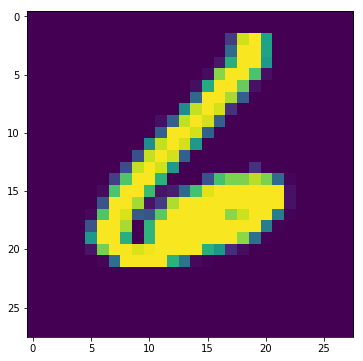

In [22]:
plt.imshow(X_0[18001,:].reshape((28,28)))
plt.show()

If we tried to do SVM classification on the whole dataset, it would take a long time.  To reduce the number of features, we perform a PCA (with details to come next lecture).

In [24]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=25,copy=True,whiten=True)
pca.fit(X_0)
X = pca.transform(X_0)
X_test = pca.transform(X_0_test)

This reduces the number of features to 25. Now we can proceed as normal.

In [25]:
classes = [0,1,2,3,4,5,6,7,8,9]

m = X.shape[0]
n = X.shape[1]
N = len(classes)

clf = svm.SVC(C=5.0,kernel='poly',gamma=0.05,cache_size=2000)
clf.fit(X,y)

y_pred_train = clf.predict(X)
y_pred_test = clf.predict(X_test)
train_accuracy = sum((y==y_pred_train).astype(float))/len(y)
test_accuracy = sum((y_test==y_pred_test).astype(float))/len(y_test)
print ('Training Accuracy: ',train_accuracy)
print ('Test Accuracy: ',test_accuracy)


Training Accuracy:  0.9989978678038379
Test Accuracy:  0.9752813852813853
